In [1]:
#Adding path to parent directory
import numpy as np
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#Loading black box utilities
from ur_evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical featues = {len(categorical_features)}")

print('X_test', X_test[1])
print('y_test', y_test)

print(features)

print(mode)

print(categorical_features)

print(sample_idx)

R2 score for the model on test set = 0.9298245614035088
Prediction model type = classification
Number of categorical featues = 0
X_test [1.016e+01 1.959e+01 6.473e+01 3.117e+02 1.003e-01 7.504e-02 5.025e-03
 1.116e-02 1.791e-01 6.331e-02 2.441e-01 2.090e+00 1.648e+00 1.680e+01
 1.291e-02 2.222e-02 4.174e-03 7.082e-03 2.572e-02 2.278e-03 1.065e+01
 2.288e+01 6.788e+01 3.473e+02 1.265e-01 1.200e-01 1.005e-02 2.232e-02
 2.262e-01 6.742e-02]
y_test [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'wor

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
mean radius 4.0734183610264996e-27 0.28732542358585167 3.4803742304453755
mean texture 0.28732542358585167 0.679248227658773 1.472215839924664
mean perimeter 0.679248227658773 0.4232817812684485 2.3624924205414652
mean area 0.4232817812684485 0.9275922571569462 1.0780598827603223
mean smoothness 0.9275922571569462 1.4348650762478103 0.6969296392766156
mean compactness 1.4348650762478103 2.546009598362342 0.3927714964795205
mean concavity 2.546009598362342 0.6271548357516422 1.594502574155399
mean concave points 0.6271548357516422 0.18798084010762656 5.319691088876185
mean symmetry 0.18798084010762656 1.6065855508198401 0.6224380640605789
mean fractal dimension 1.6065855508198401 0.6166640566487955 1.6216284851016105
radius error 0.6166640566487955 1.160060

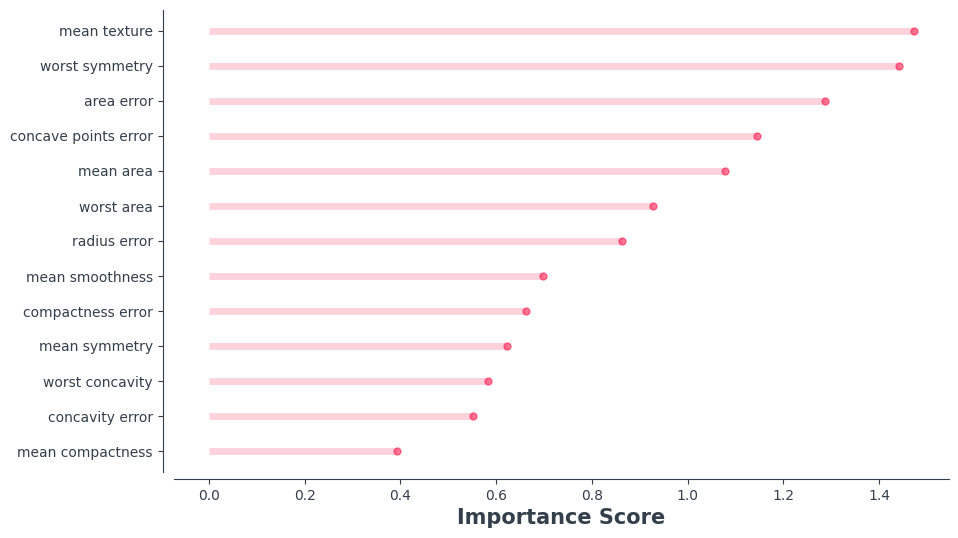

In [2]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

#Sample to be explained
sample_idx = sample_idx[0]

#Generating initial starting point
X_init = np.array([X_test[sample_idx]])

#Initializing the explainer object
f_e = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 5, \
                          normalize=False, importance_method="ARD")

In [ ]:
import matplotlib.pyplot as plt
plt.stem(explanation)

In [4]:
print(explanation)

[3.48037423 1.47221584 2.36249242 1.07805988 0.69692964 0.3927715
 1.59450257 5.31969109 0.62243806 1.62162849 0.86202389 3.85228519
 2.15339068 1.28632643 2.98993537 0.66144544 0.5515384  1.14549301
 2.20706386 2.51679826 1.84053502 1.92398349 2.50650398 0.92856421
 2.797423   1.525588   0.58220027 2.87453491 1.44103978 2.20522367]


In [5]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# Generate explantion data for Random Foreall_featuresst
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Class_Feature_Statistics
from project_utils.feature_stats import Classes_Container

UR_Stats = Feature_Statistics(feature_names = features.tolist(), mode='classification', classes=['malignant', 'benign'])

for test_instance in range(1):##X_test.shape[0]):

    X_init = np.array([X_test[test_instance]])

    UR_explain_inst = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR_w", alpha_params=0.5, \
                                  max_iter=5, normalize=False, plot=False, interval=1, importance_method="ARD")
     
    y_predict = model.predict_proba(X_init)

    print('INSTANCE: ', test_instance)
    
    UR_Stats.Add_Sample(sample     = UR_explain_inst,
                        outcome    = y_test[test_instance],
                        prediction = y_predict)
    
    
    last_instance = test_instance

[2.08375845 1.03566146 0.58319976 1.07105937 1.96828489 4.19263459
 0.74375318 0.81075181 3.94038289 1.03728124 1.44792398 0.80247696
 2.20838551 3.12469563 2.06448738 1.58347345 0.53474145 1.833161
 0.45705385 2.54791139 1.49464782 2.46099963 0.66627161 2.6018438
 0.7028974  0.79418425 6.45417722 1.5514442  1.99158053 0.82615309]
[2.08375845 1.03566146 0.58319976 1.07105937 1.96828489 4.19263459
 0.74375318 0.81075181 3.94038289 1.03728124 1.44792398 0.80247696
 2.20838551 3.12469563 2.06448738 1.58347345 0.53474145 1.833161
 0.45705385 2.54791139 1.49464782 2.46099963 0.66627161 2.6018438
 0.7028974  0.79418425 6.45417722 1.5514442  1.99158053 0.82615309]
[0.45705385 0.53474145 0.58319976 0.66627161 0.7028974  0.74375318
 0.79418425 0.80247696 0.81075181 0.82615309 1.03566146 1.03728124
 1.07105937 1.44792398 1.49464782 1.5514442  1.58347345 1.833161
 1.96828489 1.99158053 2.06448738 2.08375845 2.20838551 2.46099963
 2.54791139 2.6018438  3.12469563 3.94038289 4.19263459 6.45417722]


In [7]:
UR_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

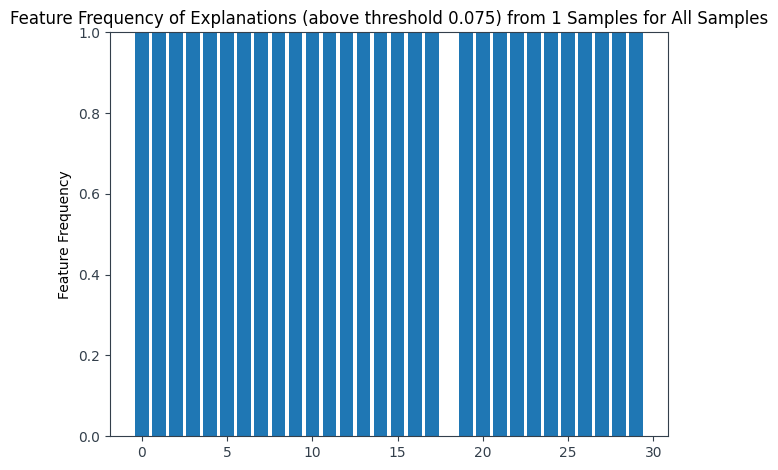

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points
9 -      mean symmetry
10 -     mean fractal dimension
11 -     radius error
12 -     texture error
13 -     perimeter error
14 -     area error
15 -     smoothness error
16 -     compactness error
17 -     concavity error
18 -     concave points error
19 -     symmetry error
20 -     fractal dimension error
21 -     worst radius
22 -     worst texture
23 -     worst perimeter
24 -     worst area
25 -     worst smoothness
26 -     worst compactness
27 -     worst concavity
28 -     worst concave points
29 -     worst symmetry
30 -     worst fractal dimension


In [8]:
UR_Stats.Frequency_Plot(top_features=False, display_feature_list=True)

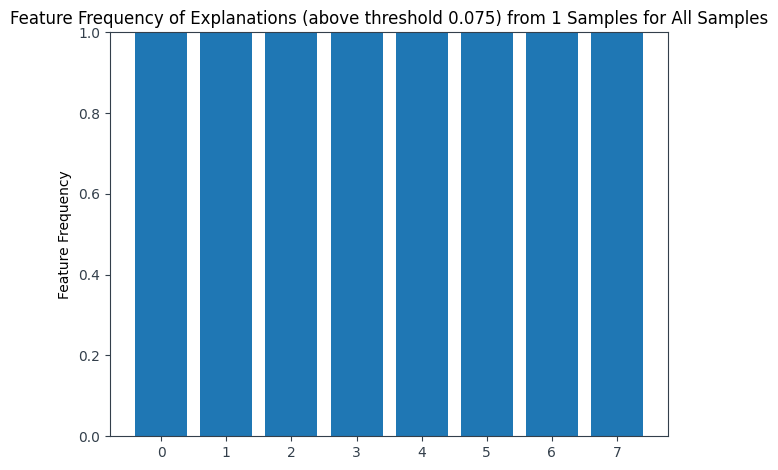

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points


In [9]:
UR_Stats.Frequency_Plot(display_feature_list=True)

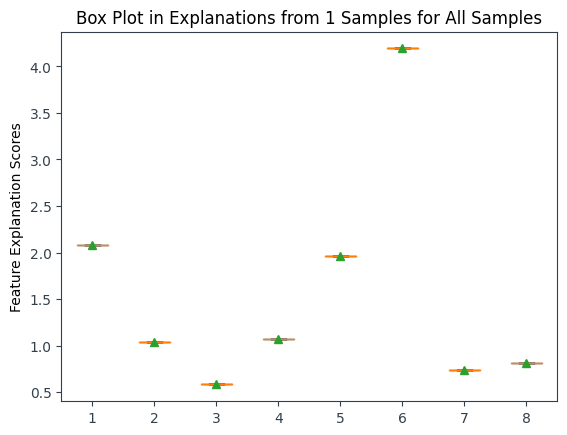

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points


In [10]:
UR_Stats.Box_Plot()

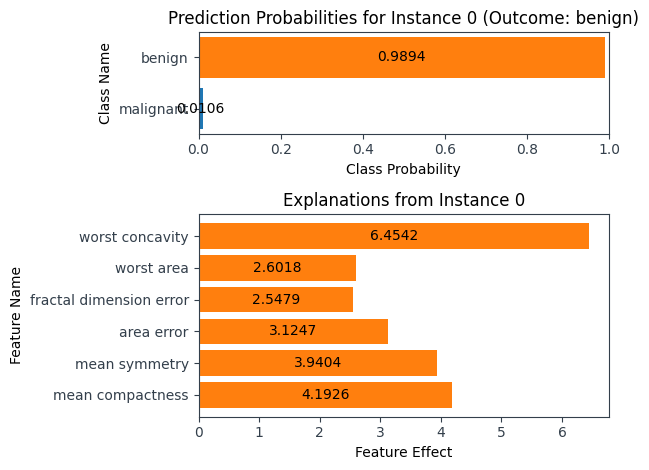

In [11]:
UR_Stats.View_Explanation(instance=0, max_features=6)

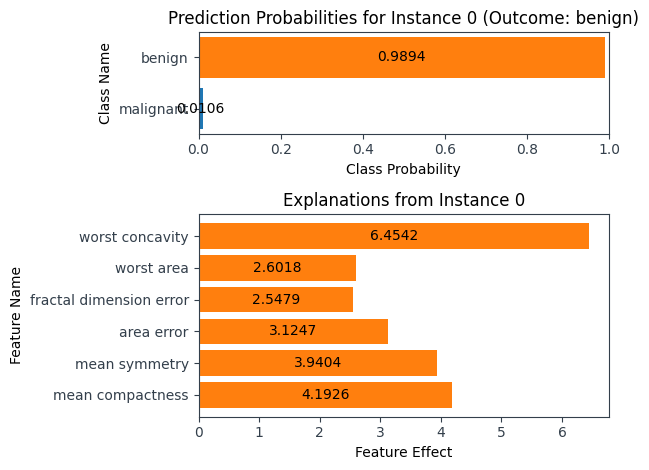

In [12]:
UR_Stats.View_Explanation(instance=0, max_features=6)

In [13]:
from project_utils.feature_stats import Classes_Container

classes_container = Classes_Container(UR_Stats)

In [14]:
classes_container.Feature_Counts(max_features=11, scaled=True, threshold=0.075)


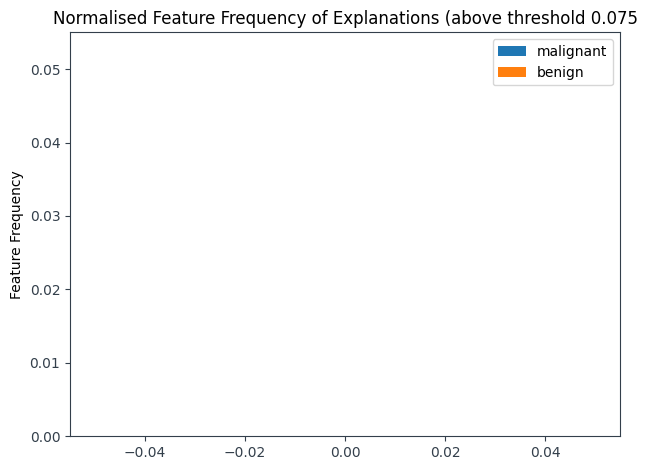

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points
9 -      mean symmetry
10 -     mean fractal dimension
11 -     radius error
12 -     texture error
13 -     perimeter error
14 -     area error
15 -     smoothness error
16 -     compactness error
17 -     concavity error
18 -     concave points error
19 -     symmetry error
20 -     fractal dimension error
21 -     worst radius
22 -     worst texture
23 -     worst perimeter
24 -     worst area
25 -     worst smoothness
26 -     worst compactness
27 -     worst concavity
28 -     worst concave points
29 -     worst symmetry
30 -     worst fractal dimension


In [15]:
classes_container.Frequency_Plot()
